# Overview of NumPy Arrays

Numeric data manipulation in Python is essentially the thing for NumPy array data structure.

We look at examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
The examples shown here may seem a bit dry but they can become very useful in real data science applications.

Some array manipulations covered:

- Attributes of arrays: Determining the size, shape, memory consumption, and data types of arrays
- Indexing into arrays: Getting and setting the value of individual array elements
- Slicing of arrays: Getting and setting smaller subarrays within a larger array
- Reshaping of arrays: Changing the shape of a given array
- Joining and splitting of arrays: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes


Consider these three arrays -  a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [1]:
import numpy as np
np.random.seed(0)  # seed for reproducibility of the random data

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array
x4 = np.random.rand(2,3,5) #for a floating point array

In [3]:
x4

array([[[0.65279032, 0.63505887, 0.99529957, 0.58185033, 0.41436859],
        [0.4746975 , 0.6235101 , 0.33800761, 0.67475232, 0.31720174],
        [0.77834548, 0.94957105, 0.66252687, 0.01357164, 0.6228461 ]],

       [[0.67365963, 0.971945  , 0.87819347, 0.50962438, 0.05571469],
        [0.45115921, 0.01998767, 0.44171092, 0.97958673, 0.35944446],
        [0.48089353, 0.68866118, 0.88047589, 0.91823547, 0.21682214]]])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [8]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)


x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Another useful attribute is the ``dtype``, the data type of the array 

In [9]:
print("dtype:", x3.dtype)

dtype: int64


Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [10]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

In [11]:
# an array of mixed value types
a = np.array([1,2,3.0, 2.0])
print(a.dtype) # U32 - character string
print(a.itemsize) # 128 bytes
print(a.nbytes) # 

float64
8
32


In [12]:
# what about this?
a = np.array([1,2, 5])
print(a.dtype) # should be float64
print(a.itemsize) # 8 bytes
print(a.nbytes)

int64
8
24


## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [13]:
x1

array([5, 0, 3, 3, 7, 9])

In [14]:
x1[0]

5

In [15]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [16]:
x1[-1] # similar to a standard List, Tuple, or Dictionary

9

In [17]:
x1[-2]

7

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [18]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [19]:
x2[0, 0]

3

In [20]:
x2[2, 0]

1

In [21]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [22]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. No warning, no runtime error message!

In [23]:
print("x1 before ", x1)
x1[0] = 3.14159  # this will be truncated!
print("x1 after ", x1)

x1 before  [5 0 3 3 7 9]
x1 after  [3 0 3 3 7 9]


In [24]:
# a list will behave differently
t = [9,4,5]
t[0] = 11.5
t

[11.5, 4, 5]

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

In [25]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [27]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [28]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [36]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [30]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [33]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [31]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [32]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [33]:
x2[:2, :3]  # first two rows, first three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

Array dimensions can even be reversed together:

In [34]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [37]:
#print(x2)
#print()
print(x2[:, 1])  # first column of x2

[5 6 6]


In [46]:
#print(x2)
#print()
print(x2[0, :])  # first row of x2

[3 5 2 4]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [34]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [35]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


Let's extract a $2 \times 2$ subarray from this:

In [36]:
x2_sub = x2[:2, :2] # first two rows, first two columns
print(x2_sub)

[[12  5]
 [ 7  6]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [37]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [38]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [39]:
x2_sub_copy = x2[:2, :2].copy() # use copy function 
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [50]:
x2_sub_copy[0, 0] = 42 # will only modify the copy
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [40]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [42]:
grid = np.arange(1, 10).reshape((3,3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. 


Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method.

In [3]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [4]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [5]:
# what does thid do? row vector, similar to x.reshape((1, 3))
x[np.newaxis, :]

array([[1, 2, 3]])

In [6]:
# what does this do? column vector - similar to x.reshape((3, 1))
x[:,np.newaxis]

array([[1],
       [2],
       [3]])

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [44]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])# the arrays are passed as a list

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [45]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [46]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
grid2 = np.array([[7,8,9],
                 [10,11,12]])

In [48]:
# concatenate along the first axis
np.concatenate([grid, grid2])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [63]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

For working with arrays of mixed dimensions, it is better to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [64]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])
#np.concatenate([x,grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [65]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

**Array Arithmetic**
The operations `+  -  *  /  %` are applied on the elements, this means that the arrays have to have the same size. 

In [14]:
import numpy as np

x = np.array([1, 5, 2])
y = np.array([7, 4, 1])
x + y

array([8, 9, 3])

In [15]:
x * y

array([ 7, 20,  2])

In [16]:
x - y

array([-6,  1,  1])

In [17]:
x / y

array([0.14285714, 1.25      , 2.        ])

In [18]:
x%y

array([1, 1, 0])

#### Scalar Product / Dot Product

- the dot product is an algebraic operation that takes two coordinate vectors of equal size and returns a single number. 
- the result is calculated by multiplying corresponding entries and adding up those products. The name `dot product` stems from the fact that the centered dot `·` is often used to designate this operation. The name "scalar product" focusses on the scalar nature of the result. of the result.

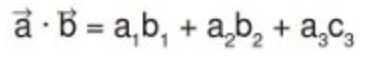

See example below:

In [19]:
x = np.array([1, 2, 3])
y = np.array([-7, 8, 9])
np.dot(x, y)

36

### Matrix product

- The matrix product of two matrices can be calculated if the number of columns of the left matrix is equal to the number of rows of the second or right matrix.

The formula   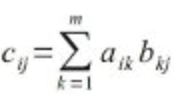

illustrated further:

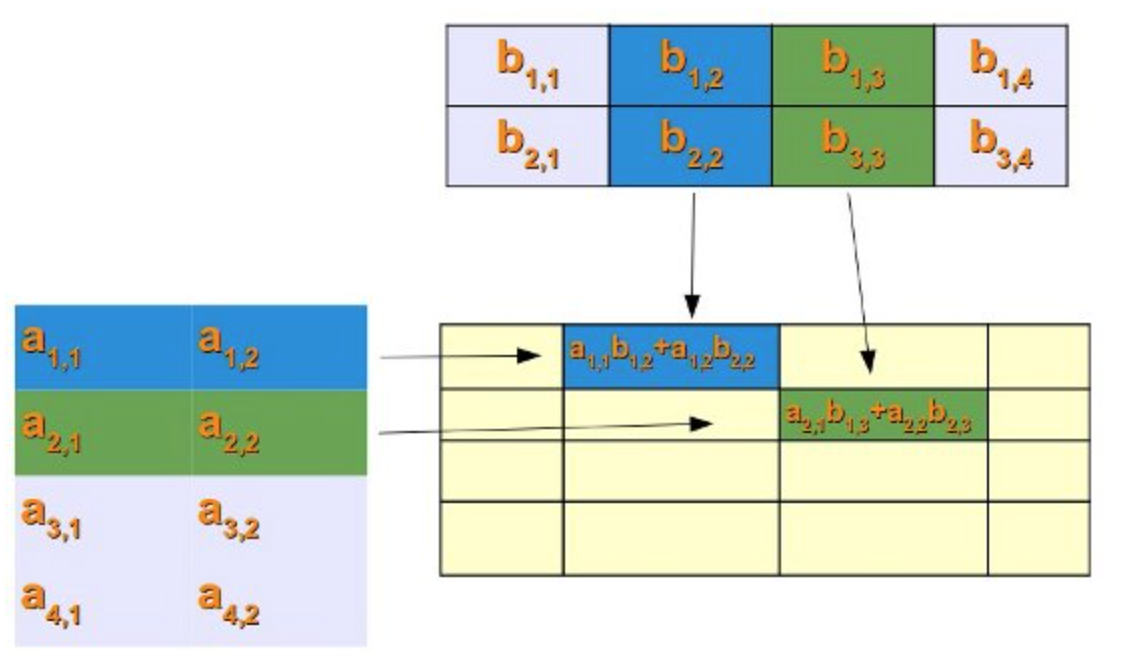

In [26]:
x = np.array(((2,3), (3, 5)))
y = np.matrix( ((1,2), (5, -1)))
print(x)
print()
print(y)
print()
print(np.dot(x,y))

[[2 3]
 [3 5]]

[[ 1  2]
 [ 5 -1]]

[[17  1]
 [28  1]]


### references

https://numpy.org/doc/stable/user/absolute_beginners.html

https://numpy.org/doc/stable/reference/